# Abstract

This project addresses the critical issue of employee attrition at HumanForYou by developing a robust predictive framework utilizing machine learning. Various models, including **Logistic Regression**, **Decision Tree**, **Random Forest**, and **SVM**, were evaluated based on performance metrics such as *accuracy, precision, recall, F1-score, and ROC-AUC*. Among these, the **Random Forest** model emerged as the most reliable predictor of attrition. The insights derived from this model informed a series of proposed solutions aimed at reducing turnover, including targeted retention strategies, improved hiring practices, continuous monitoring, and data-driven policy formulation. This integrated approach equips HumanForYou with the tools to enhance employee engagement and foster long-term organizational success.

# Introduction

Employee attrition poses a significant challenge for organizations, impacting productivity, morale, and overall business performance. For HumanForYou, a pharmaceutical company, understanding and mitigating employee turnover is critical to maintaining its competitive edge in the industry. This project aims to predict employee attrition using machine learning models, enabling the company to take proactive measures to retain valuable talent. By analyzing historical employee data and leveraging advanced predictive algorithms, the project identifies key drivers of attrition and provides actionable insights for HumanForYou's HR strategy.

# Preparing the environment

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter warnings to make them less noisy
warnings.filterwarnings("ignore")  # Set to 'default' or 'ignore' to control visibility

# Notebook stability (reproducibility)
np.random.seed(42)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, mutual_info_classif, VarianceThreshold
from scipy.stats import pearsonr

# Saving Pictures

In [3]:
# Pretty pictures directly in the notebook
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# Saving the figures 
PROJECT_ROOT_DIR = "." 
CHAPTER_ID = "classification"
def save_fig(fig_id, tight_layout=True):  
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")  
    print("Saving figure", fig_id)  
    if tight_layout:  
        plt.tight_layout()  
        plt.savefig(path, format='png', dpi=300)

# Reading the Dataset

The datasets were cleaned and merged into one csv file `final_dataset.csv` 

This was done in `Data Wrangling.ipynb`

In [5]:
current_directory = os.getcwd()
data_path = os.path.join(current_directory, "final_dataset.csv")
df = pd.read_csv(data_path)

In [6]:
df.head()

,EmployeeID,Total Hours Worked,JobInvolvement,PerformanceRating,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,1844.8,3,3,51,0,2,2,6,2,...,11,0,1.0,6,1,0,0,3.0,4.0,2.0
1,2,1928.2,2,4,31,1,1,1,10,1,...,23,1,6.0,3,5,1,4,3.0,2.0,4.0
2,3,1739.2,3,3,32,0,1,1,17,4,...,15,3,5.0,2,5,0,3,2.0,2.0,1.0
3,4,1794.8,2,3,38,0,0,1,2,5,...,11,3,13.0,5,8,7,5,4.0,4.0,3.0
4,5,2003.6,3,3,32,0,2,1,10,1,...,12,2,9.0,2,6,0,4,4.0,1.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Total Hours Worked       4410 non-null   float64
 2   JobInvolvement           4410 non-null   int64  
 3   PerformanceRating        4410 non-null   int64  
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   int64  
 6   BusinessTravel           4410 non-null   int64  
 7   Department               4410 non-null   int64  
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   int64  
 11  Gender                   4410 non-null   int64  
 12  JobLevel                 4410 non-null   int64  
 13  JobRole                  4410 non-null   int64  
 14  MaritalStatus           

In [8]:
df.describe()

,EmployeeID,Total Hours Worked,JobInvolvement,PerformanceRating,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,1917.427891,2.729932,3.153741,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,...,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492
std,1273.201673,333.518546,0.711400,0.360742,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,...,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541
min,1.000000,1471.600000,1.000000,3.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1103.250000,1656.450000,2.000000,3.000000,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,...,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,2205.500000,1848.100000,3.000000,3.000000,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,...,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,2083.050000,3.000000,3.000000,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,...,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,4410.000000,2750.200000,4.000000,4.000000,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,...,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


In [9]:
# Check for missing values
df.isnull().sum()

EmployeeID                 0
Total Hours Worked         0
JobInvolvement             0
PerformanceRating          0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [10]:
df.dtypes

EmployeeID                   int64
Total Hours Worked         float64
JobInvolvement               int64
PerformanceRating            int64
Age                          int64
Attrition                    int64
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
Gender                       int64
JobLevel                     int64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

In [11]:
df.nunique()

EmployeeID                 4410
Total Hours Worked         3354
JobInvolvement                4
PerformanceRating             2
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
dtype: int64

## Visualizing the Dataset

- Box plots were used to visualize the distribution of features against the 'Attrition' target variable.  
- This helps in identifying the spread, central tendency, and potential outliers for each feature with respect to the attrition status.

In [12]:
# Calculate variance for all columns to identify features with significant variability
variance = df.var().sort_values(ascending=False)
variance

MonthlyIncome              2.215480e+09
EmployeeID                 1.621042e+06
Total Hours Worked         1.112346e+05
Age                        8.341719e+01
DistanceFromHome           6.569144e+01
TotalWorkingYears          6.044269e+01
YearsAtCompany             3.751728e+01
PercentSalaryHike          1.338907e+01
YearsWithCurrManager       1.272582e+01
YearsSinceLastPromotion    1.037935e+01
NumCompaniesWorked         6.219598e+00
JobRole                    6.057815e+00
EducationField             1.771740e+00
TrainingTimesLastYear      1.661465e+00
JobLevel                   1.224760e+00
JobSatisfaction            1.214561e+00
EnvironmentSatisfaction    1.187776e+00
Education                  1.048438e+00
StockOptionLevel           7.257053e-01
MaritalStatus              5.328345e-01
JobInvolvement             5.060896e-01
WorkLifeBalance            4.949699e-01
BusinessTravel             4.426294e-01
Department                 2.784384e-01
Gender                     2.400544e-01


In [13]:
# Features to visualize
selected_features = [
    "MonthlyIncome",
    "Age",
    "DistanceFromHome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "PercentSalaryHike",
    "YearsWithCurrManager",
    "YearsSinceLastPromotion",
    "NumCompaniesWorked",
    "JobRole",
]

Saving figure MonthlyIncome vs Attrition


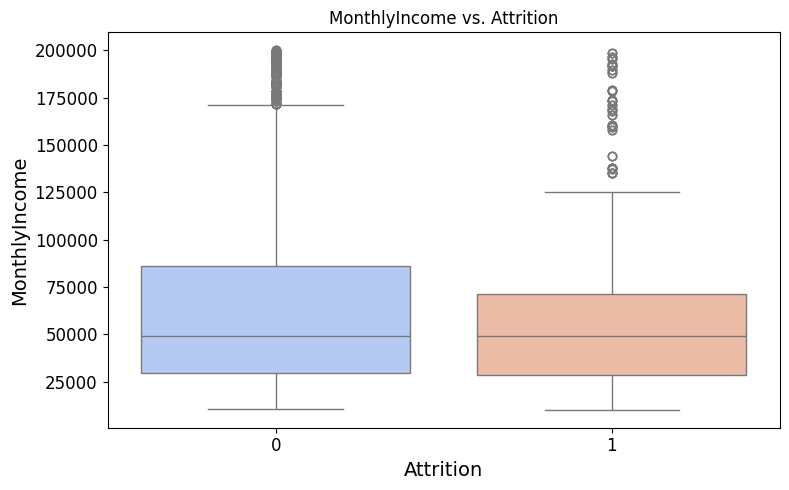

Saving figure Age vs Attrition


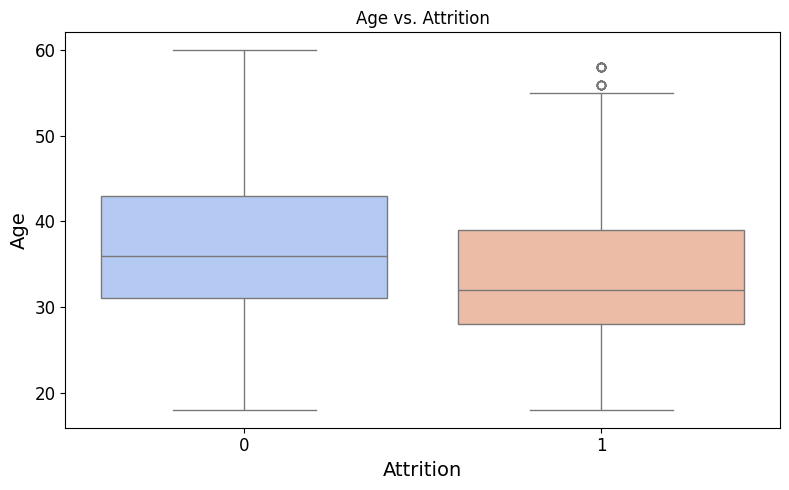

Saving figure DistanceFromHome vs Attrition


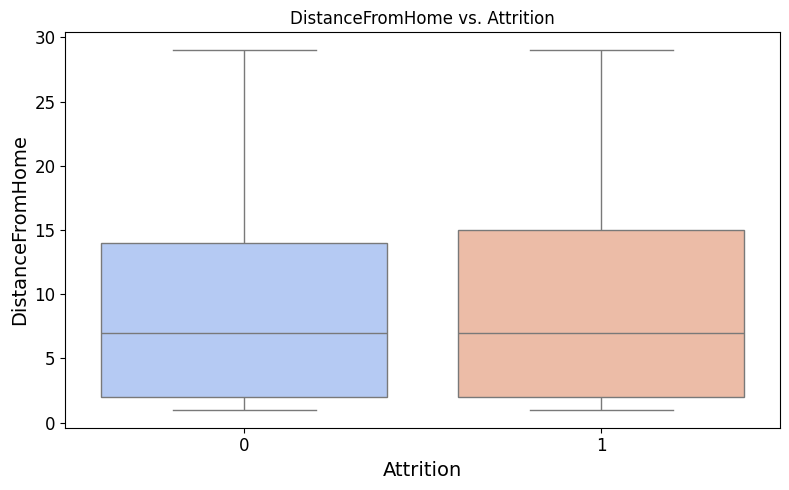

Saving figure TotalWorkingYears vs Attrition


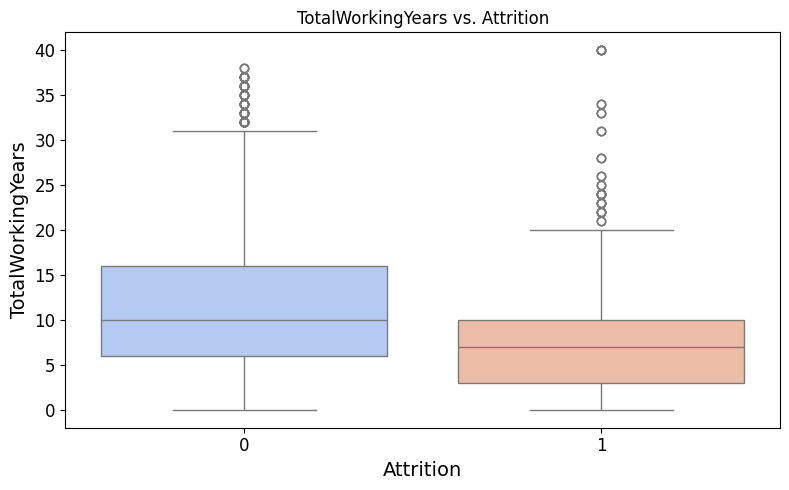

Saving figure YearsAtCompany vs Attrition


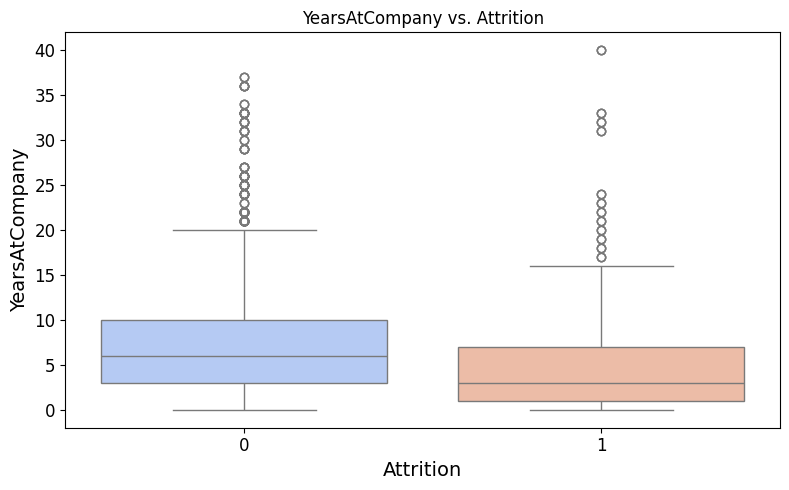

Saving figure PercentSalaryHike vs Attrition


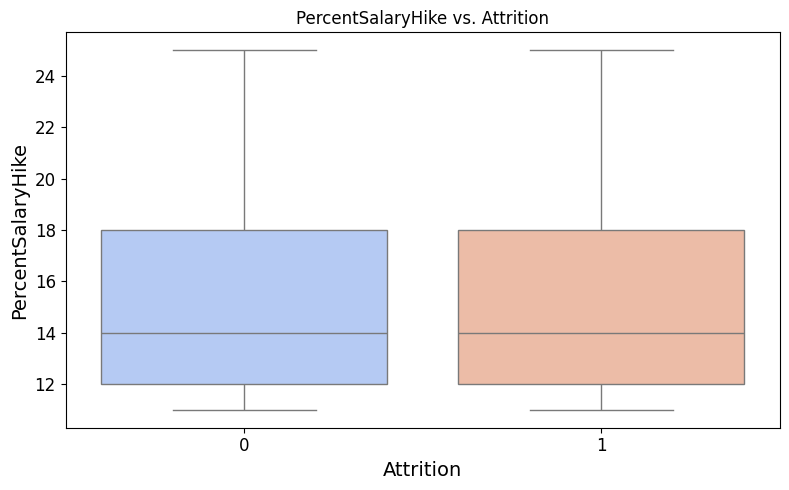

Saving figure YearsWithCurrManager vs Attrition


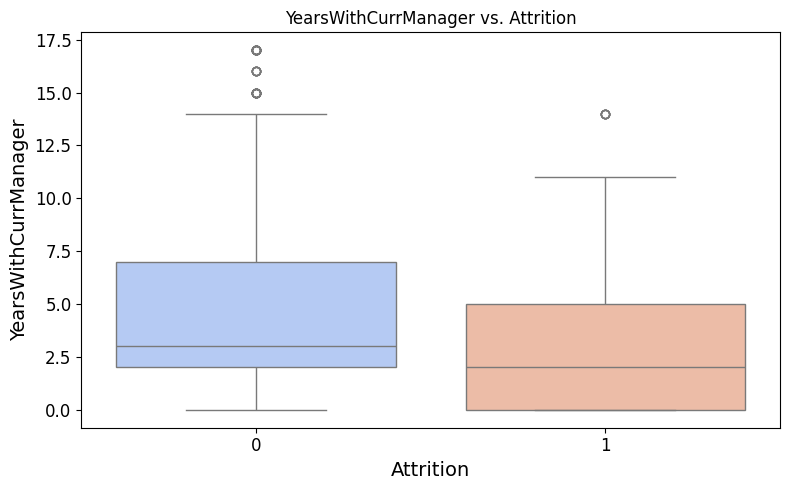

Saving figure YearsSinceLastPromotion vs Attrition


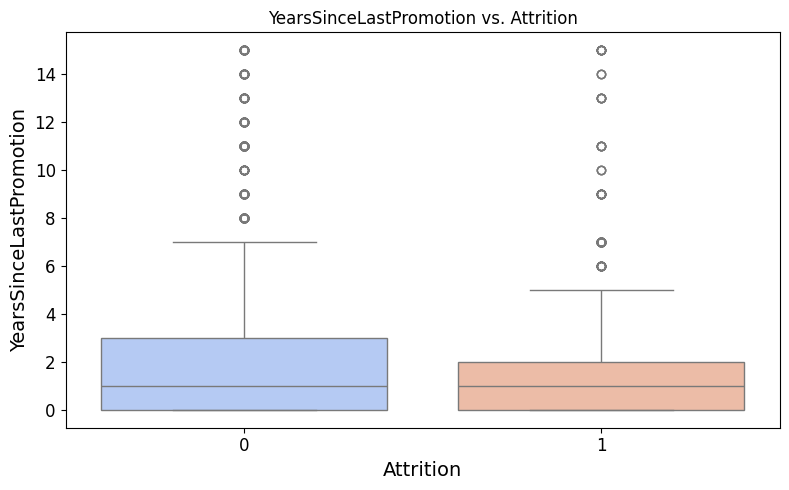

Saving figure NumCompaniesWorked vs Attrition


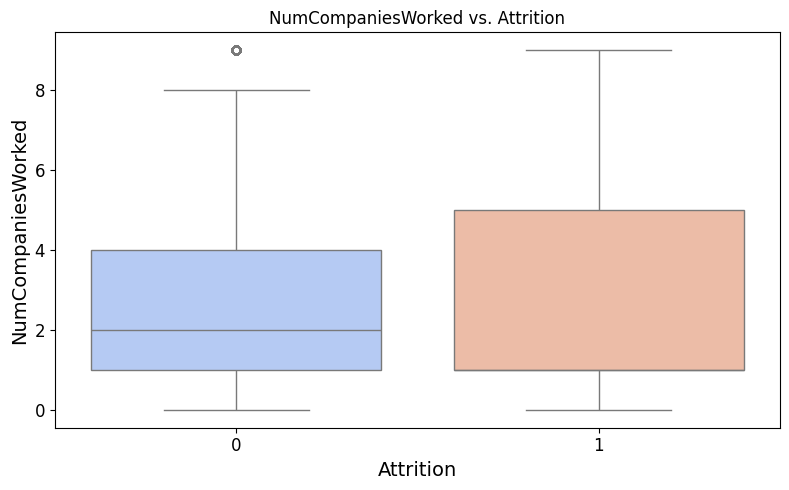

Saving figure JobRole vs Attrition


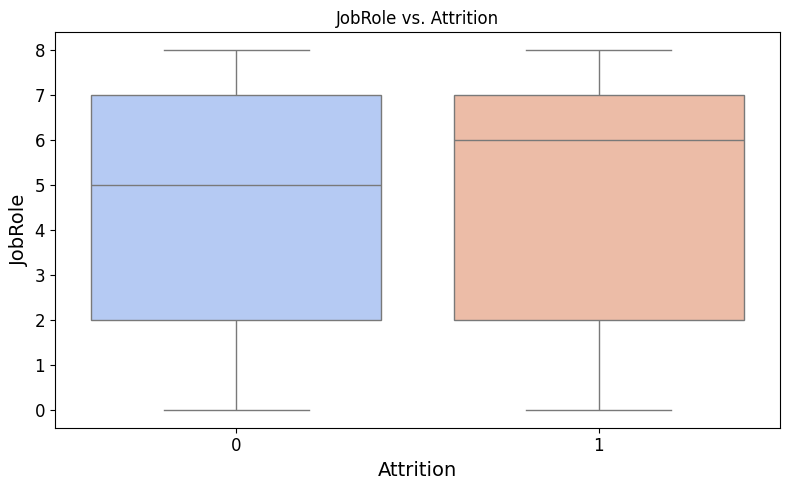

In [14]:
for feature in selected_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        if df[feature].dtype in ['int64', 'float64']:  # Numeric feature
            sns.boxplot(data=df, x="Attrition", y=feature, palette="coolwarm")
            plt.title(f"{feature} vs. Attrition")
        else:  # Categorical feature (e.g., JobRole)
            sns.countplot(data=df, x=feature, hue="Attrition", palette="viridis")
            plt.title(f"Attrition by {feature}")
            plt.xticks(rotation=45)
        plt.tight_layout()
        save_fig(f"{feature} vs Attrition")
        plt.show()

# Feature Selection

Statistical-based feature$^{[1]}$ selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

**Feature Selection Process**

- **Step 1: Remove Low Variance Features**  
  Used `VarianceThreshold` to remove features with variance below a set threshold (0.01). This step eliminates features that do not provide meaningful information for the model.
  
- **Step 2: Remove Highly Correlated Features**  
  Calculated the correlation matrix for the high-variance features and removed those with correlation values above 0.9. This helps in reducing multicollinearity, which can negatively impact model performance.

- **Step 3: Statistical Tests for Feature Relevance**  
  Applied Pearson's correlation to test the statistical significance of features in relation to the target variable (Attrition). Features with a p-value below 0.05 were retained, while statistically insignificant features were dropped.

- **Final Step: Save Selected Features**  
  The relevant features were saved to a new DataFrame and exported as a CSV file (`selected_features.csv`).

In [15]:
# Separate features and target variable
X = df.drop(columns=['Attrition'])  
y = df['Attrition']

# Step 1: Remove low variance features
# VarianceThreshold removes features with variance below the threshold
threshold = 0.01  # Set a threshold for variance
selector = VarianceThreshold(threshold)
X_high_variance = selector.fit_transform(X)

# Identify dropped low variance features
low_variance_columns = X.columns[~selector.get_support()]
print(f"Dropped low variance columns: {low_variance_columns.tolist()}")

# Keep column headers for high variance features
high_variance_columns = X.columns[selector.get_support()]
X_high_variance = pd.DataFrame(X_high_variance, columns=high_variance_columns)

# Step 2: Remove highly correlated features
# Calculate correlation matrix
correlation_matrix = pd.DataFrame(X_high_variance).corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find and drop highly correlated features
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print(f"Dropped highly correlated columns: {highly_correlated_features}")

# Drop highly correlated features
X_uncorrelated = pd.DataFrame(X_high_variance).drop(columns=highly_correlated_features)

# Step 3: Use statistical tests to evaluate feature relevance
# For example, Pearson correlation coefficient for numeric features
relevant_features = []
dropped_statistical_columns = []  # Keep track of dropped columns here
for column in X_uncorrelated.columns:
    corr, p_value = pearsonr(X_uncorrelated[column], y)
    if p_value < 0.05:  # Keep features with statistically significant correlation
        relevant_features.append(column)
    else:
        dropped_statistical_columns.append(column)

print(f"Dropped statistically insignificant columns: {dropped_statistical_columns}")

# Final selected features
X_selected = X_uncorrelated[relevant_features]

# Save the selected features to a new DataFrame
selected_features_df = pd.DataFrame(X_selected, columns=relevant_features)
selected_features_df.insert(0, 'Attrition', df['Attrition'][X_uncorrelated.index].values)

# Save the selected features to a CSV file
selected_features_df.to_csv('selected_features.csv', index=False)

Dropped low variance columns: []
Dropped highly correlated columns: []
Dropped statistically insignificant columns: ['EmployeeID', 'JobInvolvement', 'PerformanceRating', 'BusinessTravel', 'DistanceFromHome', 'Education', 'Gender', 'JobLevel', 'JobRole', 'StockOptionLevel']


# Reading New Dataset after Feature Selection

In [16]:
data_path = os.path.join(current_directory, "selected_features.csv")
df = pd.read_csv(data_path)

In [17]:
df.head()

,Attrition,Total Hours Worked,Age,Department,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0,1844.8,51.0,2.0,1.0,1.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,3.0,4.0,2.0
1,1,1928.2,31.0,1.0,1.0,2.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,3.0,2.0,4.0
2,0,1739.2,32.0,1.0,4.0,1.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,2.0,2.0,1.0
3,0,1794.8,38.0,1.0,1.0,1.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,4.0,4.0,3.0
4,0,2003.6,32.0,1.0,3.0,2.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,4.0,1.0,3.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   int64  
 1   Total Hours Worked       4410 non-null   float64
 2   Age                      4410 non-null   float64
 3   Department               4410 non-null   float64
 4   EducationField           4410 non-null   float64
 5   MaritalStatus            4410 non-null   float64
 6   MonthlyIncome            4410 non-null   float64
 7   NumCompaniesWorked       4410 non-null   float64
 8   PercentSalaryHike        4410 non-null   float64
 9   TotalWorkingYears        4410 non-null   float64
 10  TrainingTimesLastYear    4410 non-null   float64
 11  YearsAtCompany           4410 non-null   float64
 12  YearsSinceLastPromotion  4410 non-null   float64
 13  YearsWithCurrManager     4410 non-null   float64
 14  EnvironmentSatisfaction 

In [19]:
df.describe()

,Attrition,Total Hours Worked,Age,Department,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.161224,1917.427891,36.923810,1.260544,2.247619,1.097279,65029.312925,2.691837,15.209524,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492
std,0.367780,333.518546,9.133301,0.527673,1.331067,0.729955,47068.888559,2.493912,3.659108,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541
min,0.000000,1471.600000,18.000000,0.000000,0.000000,0.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1656.450000,30.000000,1.000000,1.000000,1.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,1848.100000,36.000000,1.000000,2.000000,1.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,0.000000,2083.050000,43.000000,2.000000,3.000000,2.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,1.000000,2750.200000,60.000000,2.000000,5.000000,2.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


In [20]:
df.shape

(4410, 17)

In [21]:
# Features to visualize
selected_features = [
    "MonthlyIncome",
    "Age",
    "DistanceFromHome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "PercentSalaryHike",
    "YearsWithCurrManager",
    "YearsSinceLastPromotion",
    "NumCompaniesWorked",
    "JobRole",
]

Saving figure MonthlyIncome vs Attrition


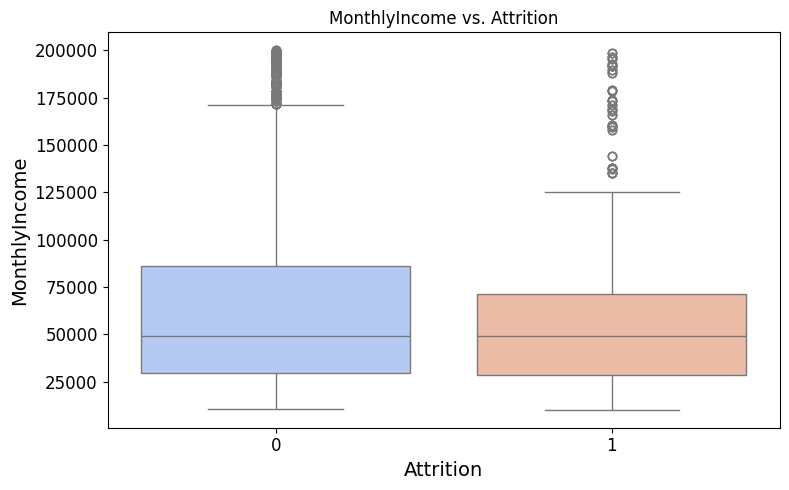

Saving figure Age vs Attrition


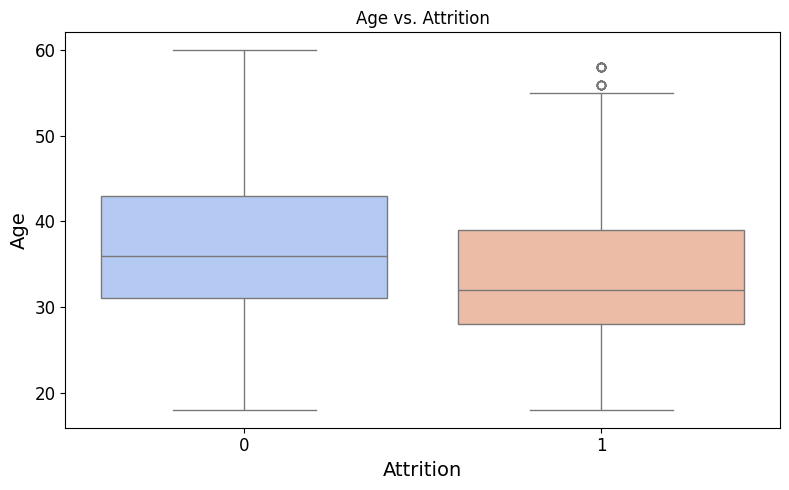

Saving figure TotalWorkingYears vs Attrition


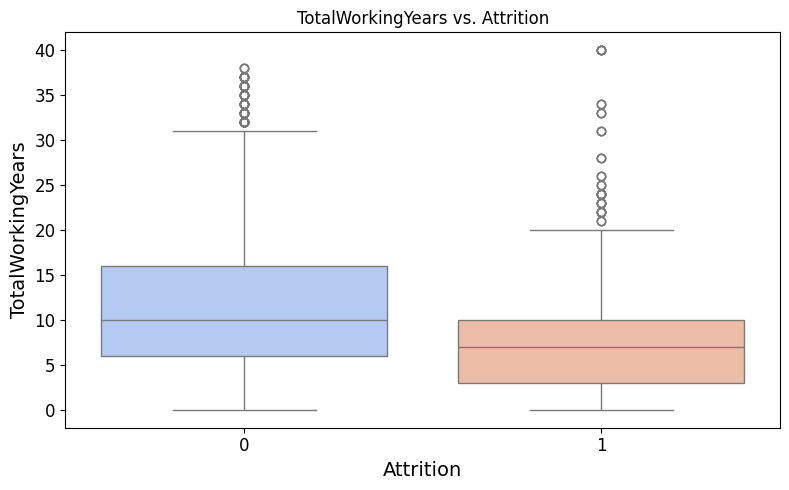

Saving figure YearsAtCompany vs Attrition


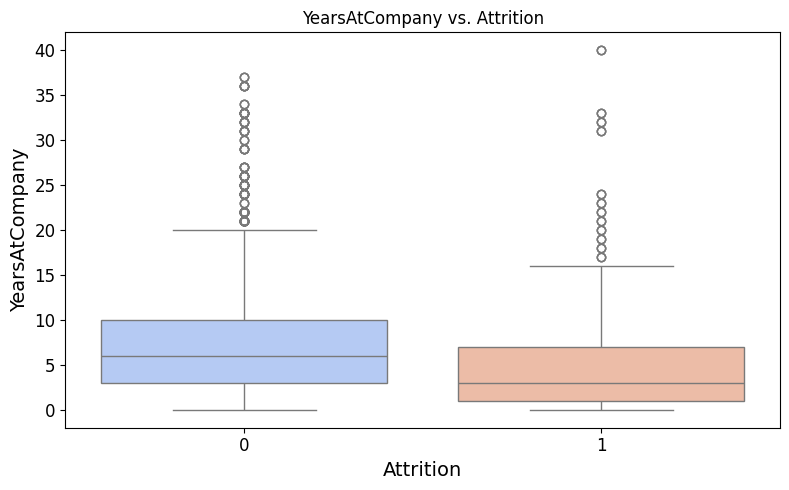

Saving figure PercentSalaryHike vs Attrition


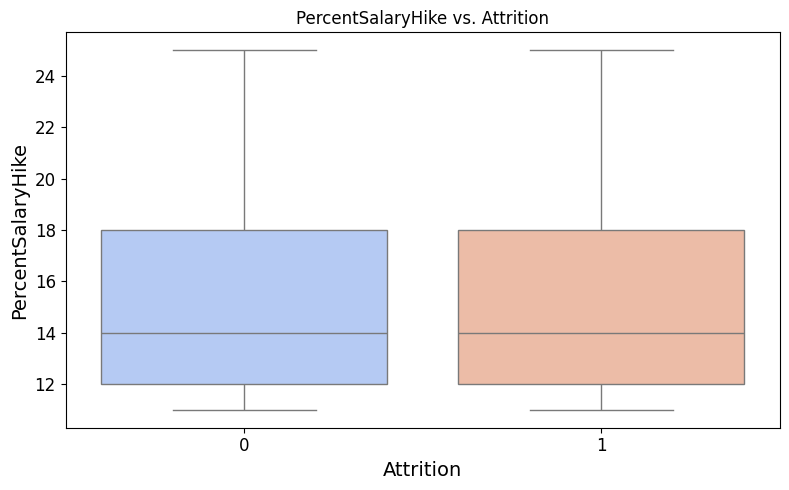

Saving figure YearsWithCurrManager vs Attrition


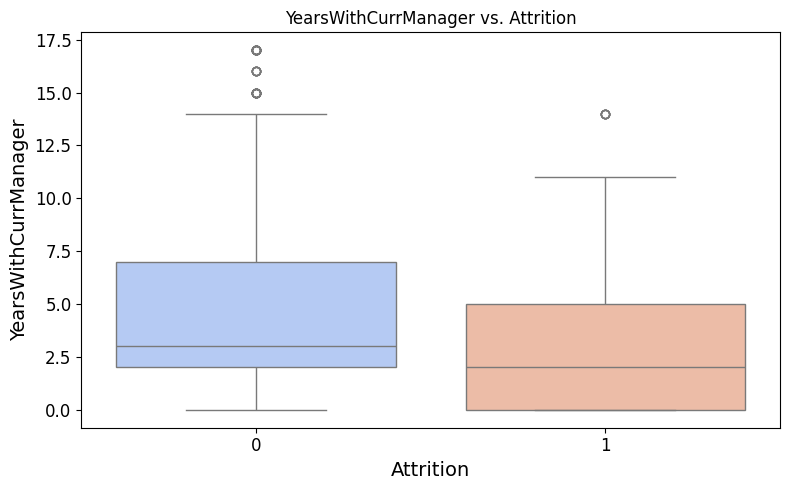

Saving figure YearsSinceLastPromotion vs Attrition


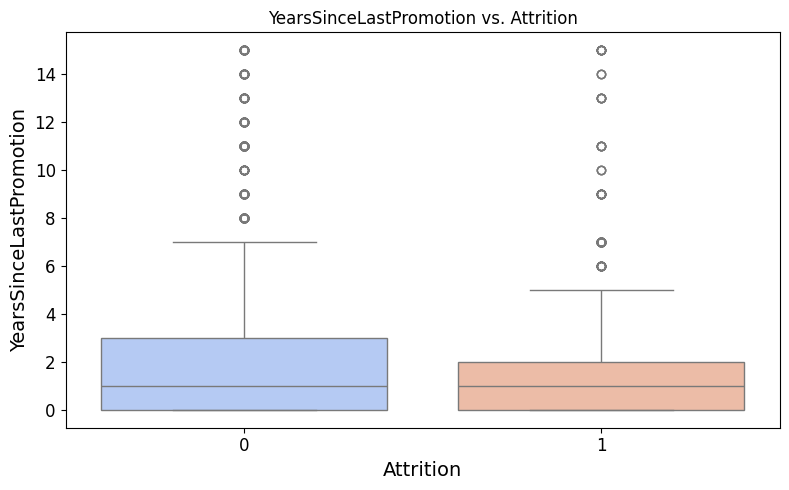

Saving figure NumCompaniesWorked vs Attrition


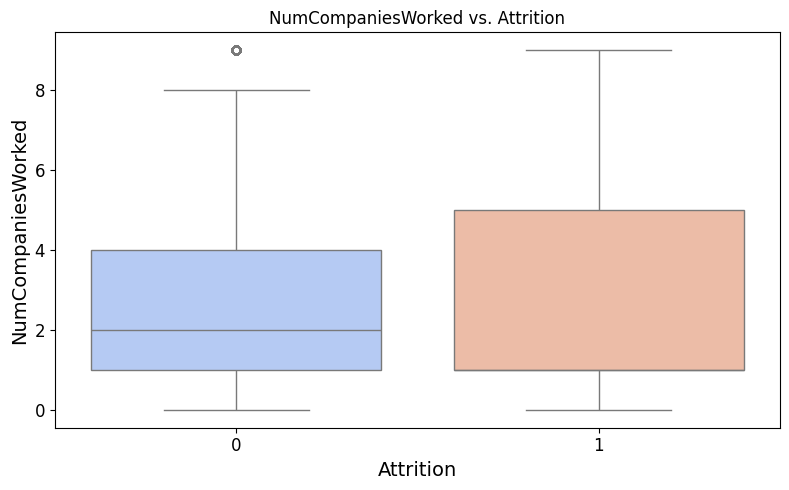

In [22]:
for feature in selected_features:
    if feature in df.columns:  # Ensure the feature exists in the selected features DataFrame
        plt.figure(figsize=(8, 5))
        
        # Check the type of the feature (numeric or categorical)
        if df[feature].dtype in ['int64', 'float64']:  # Numeric feature
            sns.boxplot(data=df, x="Attrition", y=feature, palette="coolwarm")
            plt.title(f"{feature} vs. Attrition")
        else:  # Categorical feature (e.g., JobRole)
            sns.countplot(data=df, x=feature, hue="Attrition", palette="viridis")
            plt.title(f"Attrition by {feature}")
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        save_fig(f"{feature} vs Attrition")  # Save the plot
        plt.show()  # Display the plot

# Splitting the dataset

- **Stratified Shuffle Split**  
  Used `StratifiedShuffleSplit`$^{[2]}$ to ensure that the class distribution of the target variable ('Attrition') is preserved in both the training and testing sets. This technique ensures a more representative split, especially for imbalanced datasets.

- **Data Split**  
  The dataset was split into training and test sets using an 80-20 ratio (test size = 0.2) with `random_state=42` for reproducibility. The `split.split(X, y)` function was used to generate the indices for training and test sets.

- **Training and Test Sets**  
  The training and test sets (`X_train`, `X_test`, `y_train`, `y_test`) were created based on the split indices.

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

X = df.drop(columns=['Attrition'], axis=1)  # Features (excluding the target)
y = df['Attrition'] # Target (Attrition)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [24]:
X_train.head()

,Total Hours Worked,Age,Department,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
3465,1970.8,41.0,2.0,1.0,1.0,52570.0,1.0,14.0,10.0,2.0,10.0,0.0,8.0,2.0,3.0,3.0
3485,1773.8,34.0,2.0,2.0,1.0,26960.0,3.0,23.0,6.0,3.0,0.0,0.0,0.0,3.0,4.0,3.0
3052,1488.0,21.0,0.0,0.0,2.0,53730.0,1.0,12.0,1.0,2.0,1.0,0.0,0.0,3.0,2.0,3.0
2012,1563.0,28.0,1.0,1.0,0.0,29760.0,1.0,14.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,3.0
426,1502.2,40.0,1.0,3.0,0.0,192320.0,2.0,14.0,11.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0


In [25]:
y_train.head()

3465    0
3485    0
3052    1
2012    1
426     0
Name: Attrition, dtype: int64

In [26]:
X_test.head()

,Total Hours Worked,Age,Department,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
3331,1667.4,53.0,1.0,3.0,2.0,44250.0,6.0,22.0,33.0,2.0,12.0,3.0,8.0,4.0,4.0,3.0
2050,2004.4,42.0,2.0,1.0,2.0,22850.0,0.0,16.0,22.0,3.0,21.0,13.0,14.0,3.0,1.0,2.0
1213,1664.4,49.0,2.0,1.0,1.0,58100.0,1.0,21.0,10.0,2.0,10.0,1.0,7.0,3.0,2.0,3.0
2355,1967.6,45.0,2.0,1.0,1.0,58550.0,1.0,14.0,10.0,3.0,10.0,4.0,5.0,1.0,1.0,3.0
2433,1574.6,45.0,2.0,1.0,1.0,83960.0,3.0,15.0,25.0,3.0,23.0,14.0,4.0,3.0,3.0,2.0


In [27]:
y_test.head()

3331    0
2050    1
1213    0
2355    0
2433    0
Name: Attrition, dtype: int64

In [28]:
X.shape

(4410, 16)

In [29]:
y.shape

(4410,)

In [30]:
X_train.shape, y_train.shape

((3528, 16), (3528,))

In [31]:
X_test.shape, y_test.shape

((882, 16), (882,))

# Logistic Regression

- **Model Overview**  
  Logistic Regression is a linear model used for binary classification tasks. It predicts the probability of the target variable belonging to a certain class (0 or 1), based on the input features. The model applies the logistic (sigmoid) function to output probabilities between 0 and 1.

- **Equation**  
  The model predicts the log-odds of the target variable$^{[3]}$ as a linear combination of the input features:
  $
  \text{logit}(p) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n
  $
  where \( p \) is the probability of the target being 1 (attrition), and $ X_1, X_2, \dots, X_n $ are the input features.

- **Training**  
  The model is trained by finding the optimal coefficients (weights) using techniques like Maximum Likelihood Estimation (MLE) or gradient descent.

- **Evaluation Metrics**  
  Logistic Regression can be evaluated using metrics such as:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - ROC-AUC score

- **Regularization**  
  Logistic Regression may use regularization (L1, L2)$^{[4]}$ to prevent overfitting, especially when the dataset has many features.

- **Interpretability**  
  Logistic Regression coefficients can be interpreted to understand the relationship between the features and the probability of the target class. Positive coefficients increase the likelihood of the target being 1 (attrition), while negative coefficients decrease it.

In [32]:
# Create pipeline with normalization and logistic regression
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize data
    ('log_reg', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))  # Logistic Regression
])

In [33]:
# Fit the model
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=42,
                                    solver='liblinear'))])

In [34]:
# Test the model
y_pred = log_reg_pipeline.predict(X_test)

Saving figure logistic_regression_confusion_matrix


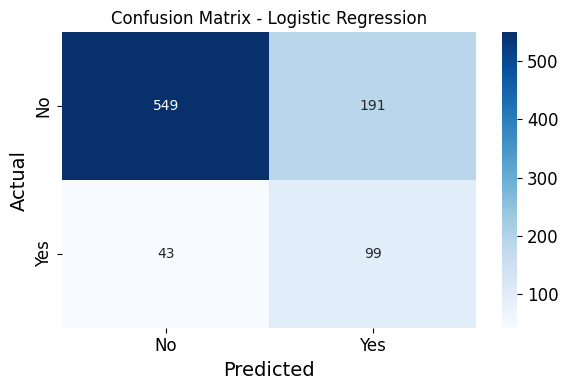

In [35]:
# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("logistic_regression_confusion_matrix")
plt.show()

In [36]:
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, log_reg_pipeline.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82       740
           1       0.34      0.70      0.46       142

    accuracy                           0.73       882
   macro avg       0.63      0.72      0.64       882
weighted avg       0.83      0.73      0.77       882

ROC AUC Score: 0.7881614008374573


Saving figure logistic_regression_roc_curve


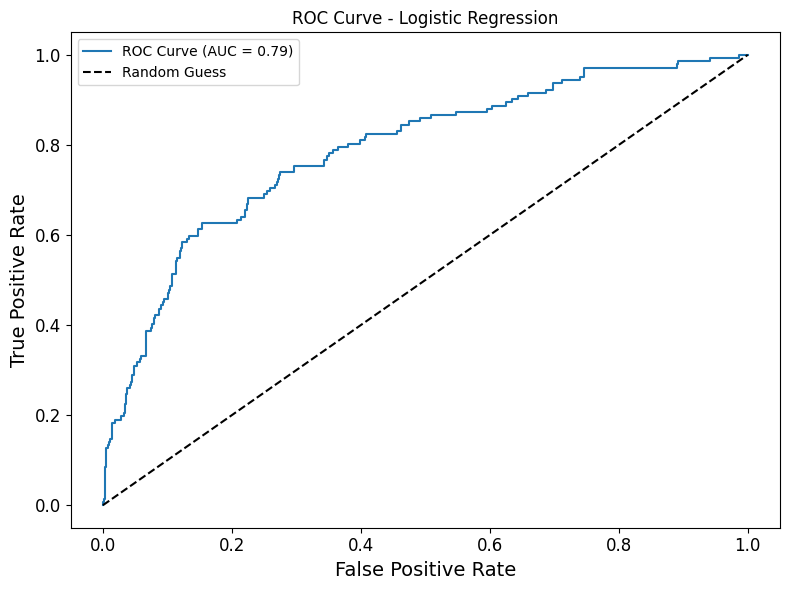

In [37]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="best")
save_fig("logistic_regression_roc_curve")
plt.show()

**Evaluation Metrics for Binary Classification**

1. **Accuracy**  
   - Definition: The proportion of correct predictions (both true positives and true negatives) out of all predictions.  
   - Formula:  
     $
     \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
     $
   - Limitation: Can be misleading, especially for imbalanced datasets.

2. **Precision**  
   - Definition: The proportion of true positive predictions out of all positive predictions made.  
   - Formula:  
     $
     \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
     $
   - Use case: Important when the cost of false positives is high.

3. **Recall (Sensitivity or True Positive Rate)**  
   - Definition: The proportion of true positive predictions out of all actual positives in the dataset.  
   - Formula:  
     $
     \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
     $
   - Use case: Critical when the cost of false negatives is high.

4. **F1-Score**  
   - Definition: The harmonic mean of precision and recall, providing a balance between the two.  
   - Formula:  
     $
     \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     $
   - Use case: Ideal when seeking a balance between precision and recall, particularly in imbalanced datasets.

5. **Specificity (True Negative Rate)**  
   - Definition: The proportion of true negative predictions out of all actual negatives.  
   - Formula:  
     $
     \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
     $
   - Use case: Useful for understanding how well the model identifies the negative class.

6. **ROC Curve (Receiver Operating Characteristic Curve)**  
   - Definition: A graphical representation of the model's performance across various thresholds, plotting the True Positive Rate (Recall) vs. the False Positive Rate.  
   - Use case: Helps visualize trade-offs between recall and false positive rate at different thresholds.

7. **AUC (Area Under the ROC Curve)**  
   - Definition: The area under the ROC curve, representing the model's ability to discriminate between the positive and negative classes.  
   - Range: 0 to 1, where 1 indicates perfect discrimination, and 0.5 indicates random predictions.

8. **Confusion Matrix**  
   - Definition: A table showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.  
   - Use case: Helps visualize performance and identify misclassification types.

Each metric provides unique insights into the model’s performance and should be selected based on the specific problem, data characteristics, and desired outcomes.

## Cross-validation

1. **Overview of Cross-Validation**  
   Cross-validation is a technique used to evaluate the performance of a model by training it multiple times on different subsets of the data and testing it on the remaining data. This provides a more robust estimate of model performance compared to a single train-test split.

2. **Stratified K-Fold Cross-Validation**  
   Stratified K-Fold is a variation of K-Fold cross-validation that ensures each fold maintains the same distribution of the target variable as the entire dataset. This is particularly useful for imbalanced datasets, ensuring that both classes are represented proportionally in each fold.

   - **K-Folds**: The dataset is split into `K` equal parts (or folds). The model is trained on `K-1` folds and tested on the remaining fold. This process is repeated `K` times, with each fold serving as the test set once.
   
   - **Stratification**: In Stratified K-Fold, the target variable's class distribution (e.g., the proportion of attrition vs. non-attrition) is preserved in each fold. This ensures that each fold has a similar class distribution, preventing a bias that could arise from an imbalanced dataset.

3. **Steps in Stratified K-Fold Cross-Validation**:
   - **Step 1**: Split the data into `K` subsets (folds) while preserving the class distribution in each fold.
   - **Step 2**: For each fold:
     - Use `K-1` folds for training the model.
     - Use the remaining fold for testing the model.
   - **Step 3**: Repeat the process for all `K` folds.
   - **Step 4**: Evaluate the model’s performance by averaging the metrics (e.g., accuracy, F1-score) across all folds.

4. **Advantages**:
   - **Better Model Evaluation**: Cross-validation gives a better estimate of model performance by reducing the variance associated with a single train-test split.
   - **Handling Imbalanced Data**: Stratified K-Fold ensures that each fold reflects the class distribution, making it a good choice for imbalanced datasets.

5. **Common Use Case**:
   - Stratified K-Fold is frequently used in classification tasks, especially when the dataset is imbalanced (e.g., predicting attrition where one class might be under-represented).

6. **Implementation**:
   - The `StratifiedKFold` class from scikit-learn can be used for this purpose. You can specify the number of splits (`K`), the random seed, and the stratification criteria.

7. **Final Evaluation**:
   After running the Stratified K-Fold cross-validation, you typically average the performance metrics (e.g., accuracy, F1-score) to get a final performance estimate of the model.

This approach reduces overfitting and ensures that the model generalizes well across different data subsets.

### On Training Set

In [38]:
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [39]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(log_reg_pipeline, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.7075
Mean CV Precision (Train): 0.3192
Mean CV Recall (Train): 0.7153
Mean CV F1 (Train): 0.4409
Mean CV Roc_auc (Train): 0.7911


### On Test Dataset

In [40]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(log_reg_pipeline, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.7131
Mean CV Precision (Test): 0.3274
Mean CV Recall (Test): 0.7195
Mean CV F1 (Test): 0.4486
Mean CV Roc_auc (Test): 0.7883


## Hyperparameter tuning

1. **Grid Search**  
   - **Overview**: Grid Search is an exhaustive search technique that involves specifying a set of hyperparameters and evaluating every possible combination of those hyperparameters. This allows for a comprehensive search over the hyperparameter space.
   - **Process**: The user defines a grid of hyperparameters, and Grid Search trains and evaluates the model for each combination. It then selects the combination that results in the best performance based on a predefined evaluation metric (e.g., F1-score, accuracy).
   - **Advantages**: 
     - Exhaustive search ensures that the best combination of hyperparameters is found within the specified grid.
     - Provides a systematic approach to finding the optimal configuration.
     - Works well when the hyperparameter space is relatively small and manageable.
   
2. **Randomized Search**  
   - **Overview**: Randomized Search is a more efficient alternative to Grid Search, where random combinations of hyperparameters are sampled from specified distributions. Unlike Grid Search, it does not test all possible combinations but samples a fixed number of combinations.
   - **Process**: The user defines ranges or distributions for hyperparameters, and Randomized Search samples random combinations from those ranges. The model is then trained and evaluated on each sample, and the best-performing combination is selected.
   - **Advantages**: 
     - Can explore a wider range of hyperparameters in a shorter amount of time.
     - Particularly useful when the hyperparameter space is large, as it avoids the computational cost of testing every combination.
     - Works well for models with many hyperparameters or when time/resources are limited.

---

**Why did we choose Grid Search?**  
   - **Grid Search** was chosen in this case due to the following reasons:
     - **Smaller Hyperparameter Space**: The model has a limited set of hyperparameters that can be tuned, making Grid Search computationally feasible and efficient.
     - **Comprehensive Search**: Since the search space is manageable, Grid Search ensures that all combinations of hyperparameters are tested, providing a guarantee of finding the best-performing configuration within the grid.
     - **Model Complexity**: For simpler models with fewer hyperparameters, Grid Search is often preferred because the exhaustive search is computationally less expensive and can yield optimal results.
     - **Precision**: Grid Search provides precise results by testing all possible configurations within the specified grid, which is particularly beneficial when the exact optimal configuration is crucial for performance.

In summary, while Randomized Search is valuable for larger search spaces or when time is limited, Grid Search was selected here due to the manageable hyperparameter space, the need for an exhaustive search, and the importance of fine-tuning the model's parameters for optimal performance.

In [41]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'log_reg__penalty': ['l1', 'l2'],  # Penalty type
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',  # Optimize for F1-score as per priority
    n_jobs=-1
)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
logreg_best_model = grid_search.best_estimator_

# Test the model
y_pred = logreg_best_model.predict(X_test)

Best Hyperparameters: {'log_reg__C': 0.1, 'log_reg__penalty': 'l1'}


Saving figure logistic_regression_confusion_matrix_tuned


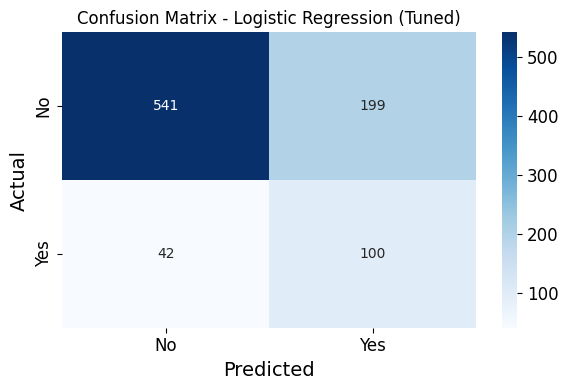

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       740
           1       0.33      0.70      0.45       142

    accuracy                           0.73       882
   macro avg       0.63      0.72      0.64       882
weighted avg       0.83      0.73      0.76       882

ROC AUC Score: 0.7842215454891511


In [42]:
# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("logistic_regression_confusion_matrix_tuned")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, logreg_best_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Saving figure logistic_regression_roc_curve_tuned


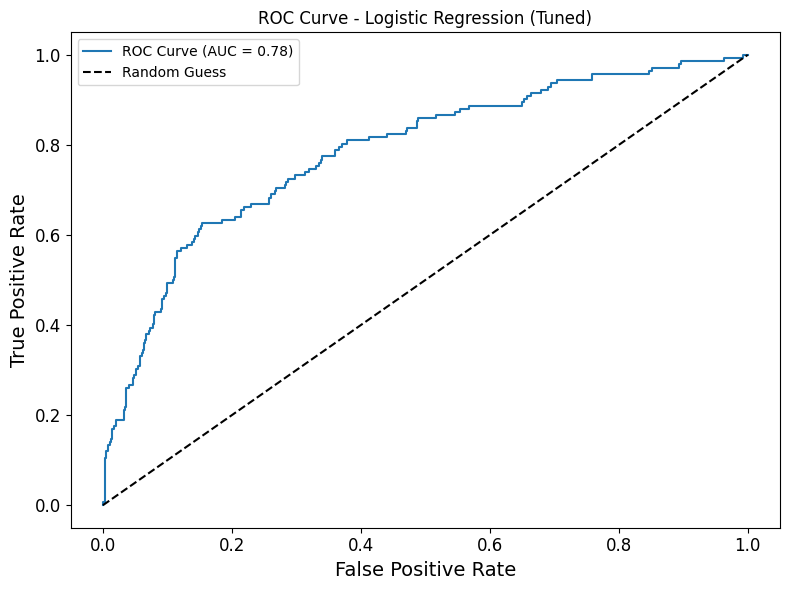

In [43]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Tuned)")
plt.legend(loc="best")
save_fig("logistic_regression_roc_curve_tuned")
plt.show()

In [44]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(logreg_best_model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.7063
Mean CV Precision (Train): 0.3198
Mean CV Recall (Train): 0.7258
Mean CV F1 (Train): 0.4434
Mean CV Roc_auc (Train): 0.7914


In [45]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(logreg_best_model, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.6927
Mean CV Precision (Test): 0.3083
Mean CV Recall (Test): 0.7186
Mean CV F1 (Test): 0.4296
Mean CV Roc_auc (Test): 0.7764


In [46]:
feature_importance = logreg_best_model.coef_[0]
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Logistic Regression")
save_fig("logistic_regression_feature_importance")
plt.show()

AttributeError: 'Pipeline' object has no attribute 'coef_'

# Decision Tree

1. **Overview**  
   A Decision Tree is a non-linear model used for both classification and regression tasks. It splits the data into subsets based on feature values, creating a tree-like structure where each node represents a decision based on one feature, and the leaves represent the final predicted output.

2. **How It Works**  
   - **Splitting**: The tree recursively splits the dataset at each node based on the feature that provides the best split, minimizing a certain criterion (e.g., Gini impurity, entropy for classification, or variance reduction for regression).
   - **Stopping Criteria**: The splitting stops when a pre-defined stopping criterion is met, such as a maximum depth, a minimum number of samples in a node, or when further splitting does not improve the model significantly.
   - **Leaf Nodes**: Each leaf node represents a predicted class label (for classification) or a continuous value (for regression), based on the majority class or average of the target variable in that node.

3. **Key Concepts**  
   - **Gini Impurity**: A measure of node impurity in classification tasks, where a lower Gini score indicates a more "pure" node (i.e., all samples in the node belong to the same class).
   - **Entropy**: Another measure of node impurity, used to evaluate splits based on information gain. The goal is to maximize information gain with each split.
   - **Overfitting**: Decision Trees are prone to overfitting, especially when the tree is very deep and overly complex. Overfitting occurs when the tree fits the noise in the training data, leading to poor generalization to unseen data.

4. **Advantages**  
   - **Interpretability**: Decision Trees are highly interpretable, making them easy to visualize and understand. The structure of the tree provides insights into how decisions are made.
   - **Non-linear Relationships**: Can model complex, non-linear relationships between features.
   - **No Feature Scaling**: Decision Trees do not require feature scaling (e.g., normalization or standardization) because they are based on feature splitting rather than distance metrics.
   - **Handles Missing Data**: Some implementations of Decision Trees can handle missing data by using surrogate splits.

5. **Disadvantages**  
   - **Overfitting**: Prone to overfitting, especially with large trees that capture noise in the training data.
   - **Instability**: Small changes in the data can lead to significantly different tree structures, making Decision Trees sensitive to variations in the training data.
   - **Bias toward features with more levels**: Decision Trees can favor features with many distinct values (e.g., categorical features with many levels) because they can easily split data into many unique subsets.

6. **Pruning**  
   - **Pre-Pruning**: Limits the tree size during the construction by setting restrictions such as maximum depth or minimum samples per node, which helps to prevent overfitting.
   - **Post-Pruning**$^{[5]}$: Involves building a fully grown tree and then removing branches that have little importance, based on a criterion such as reduced performance on the validation set.

In summary, Decision Trees are powerful tools for classification but can suffer from overfitting. Proper tuning of hyperparameters and pruning techniques can help improve their performance and generalization.

In [47]:
# Initialize the Decision Tree Classifier
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize data
    ('dt', DecisionTreeClassifier(random_state=42, class_weight='balanced'))  # Decision Tree Classifier
])

In [48]:
# Fit the model
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [49]:
# Test the model
y_pred = dt_pipeline.predict(X_test)

Saving figure decision_tree_confusion_matrix


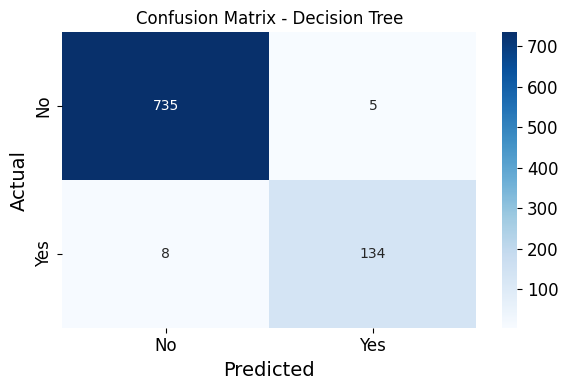

In [50]:
# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("decision_tree_confusion_matrix")
plt.show()

In [51]:
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, dt_pipeline.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       740
           1       0.96      0.94      0.95       142

    accuracy                           0.99       882
   macro avg       0.98      0.97      0.97       882
weighted avg       0.99      0.99      0.99       882

ROC AUC Score: 0.9684526075371146


Saving figure decision_tree_roc_curve


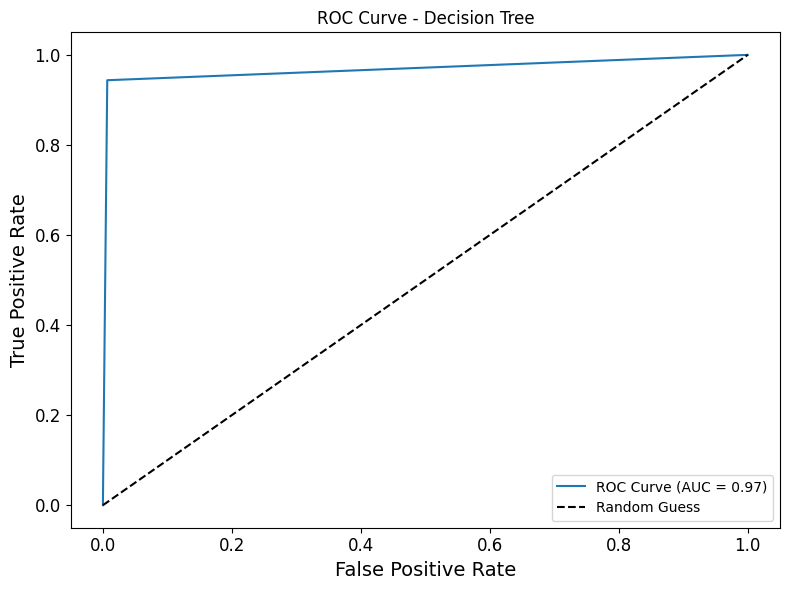

In [52]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="best")
save_fig("decision_tree_roc_curve")
plt.show()

## Cross Validation

### On Training Set

In [53]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.9674
Mean CV Precision (Train): 0.8984
Mean CV Recall (Train): 0.9035
Mean CV F1 (Train): 0.8995
Mean CV Roc_auc (Train): 0.9416


### On Test Dataset

In [54]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(dt_pipeline, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.8492
Mean CV Precision (Test): 0.5416
Mean CV Recall (Test): 0.5567
Mean CV F1 (Test): 0.5454
Mean CV Roc_auc (Test): 0.7310


## Hyperparameter Tuning

- **Max Depth**: The maximum depth of the tree. Limiting the depth can prevent overfitting.
- **Min Samples Split**: The minimum number of samples required to split an internal node.
- **Min Samples Leaf**: The minimum number of samples required to be at a leaf node.
- **Max Features**: The number of features to consider when looking for the best split.
- **Criterion**: The function used to evaluate the quality of a split, typically Gini impurity or entropy for classification.


In [55]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'dt__criterion': ['gini', 'entropy'],  # Splitting criteria
    'dt__max_depth': [None, 5, 10, 20, 50],  # Maximum depth of the tree
    'dt__min_samples_split': [2, 5, 10, 20],  # Minimum number of samples to split an internal node
    'dt__min_samples_leaf': [1, 2, 5, 10],  # Minimum number of samples in a leaf node
    'dt__max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when splitting
    'dt__max_leaf_nodes': [None, 10, 20, 50, 100],  # Maximum number of leaf nodes in the tree
    'dt__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],  # Minimum impurity decrease required to split
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',  # Optimize for F1-score as per priority
    n_jobs=-1
)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
dt_best_model = grid_search.best_estimator_

# Test the model
y_pred = dt_best_model.predict(X_test)

Best Hyperparameters: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'dt__max_features': 'sqrt', 'dt__max_leaf_nodes': None, 'dt__min_impurity_decrease': 0.0, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}


Saving figure decision_tree_confusion_matrix_tuned


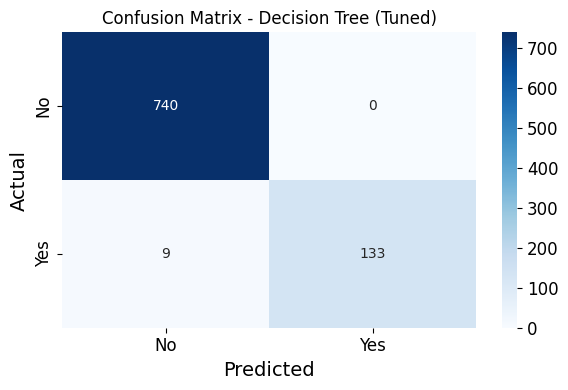

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       740
           1       1.00      0.94      0.97       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882

ROC AUC Score: 0.9683098591549295


In [56]:
# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("decision_tree_confusion_matrix_tuned")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, dt_best_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Saving figure decision_tree_roc_curve_tuned


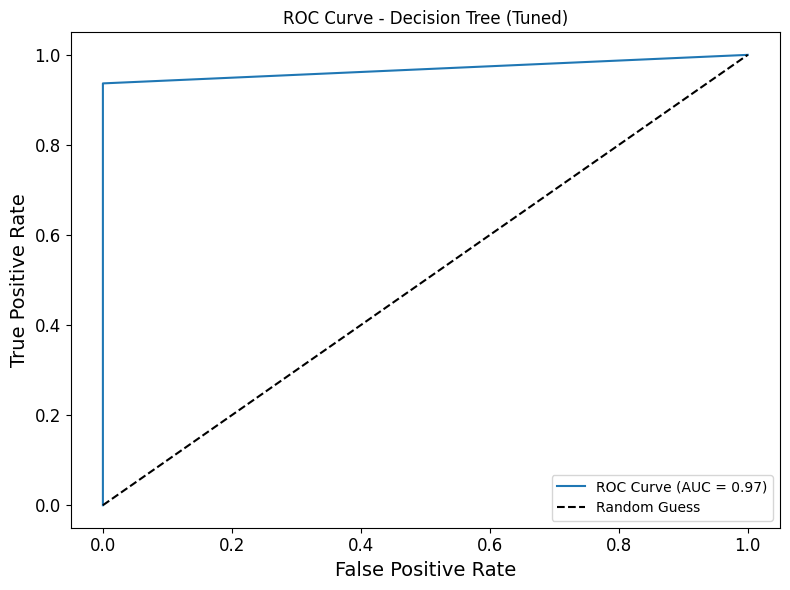

In [57]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Tuned)")
plt.legend(loc="best")
save_fig("decision_tree_roc_curve_tuned")
plt.show()

In [58]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(dt_best_model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.9790
Mean CV Precision (Train): 0.9467
Mean CV Recall (Train): 0.9228
Mean CV F1 (Train): 0.9344
Mean CV Roc_auc (Train): 0.9563


In [59]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(dt_best_model, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.8311
Mean CV Precision (Test): 0.4791
Mean CV Recall (Test): 0.5133
Mean CV F1 (Test): 0.4929
Mean CV Roc_auc (Test): 0.7026


In [60]:
feature_importance = dt_best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Decision Tree")
save_fig("decision_tree_feature_importance")
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
# Using Recursive Feature Elimination (RFE)

rfe = RFE(estimator=dt_best_model)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

print("Selected Features via RFE:", selected_features.tolist())

# Plot selected feature importance
selected_importance = feature_importance[rfe.support_]
selected_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=selected_df)
plt.title("Selected Feature Importance - Decision Tree")
save_fig("decision_tree_selected_feature_importance")
plt.show()

In [ ]:
# Plot Features Correlation with Attrition
plt.figure(figsize=(12, 10))
correlation = df.corr()['Attrition'].drop(['Attrition'])
sns.barplot(x=correlation.abs().sort_values(ascending=False), y=correlation.abs().sort_values(ascending=False).index)
plt.title("Feature Correlation with Attrition")
save_fig("decision_tree_feature_correlation")
plt.show()

# Random Forest Classifier

1. **Overview**  
   A Random Forest is an ensemble learning method used for classification and regression tasks. It constructs a forest of decision trees, typically trained with the "bagging" method (Bootstrap Aggregating)$^{[6]}$, where each tree is trained on a random subset of the training data. The final prediction is made by aggregating the predictions of all trees (e.g., majority voting for classification).

2. **How It Works$^{[7]}$**  
   - **Bootstrapping**: Random Forest generates multiple subsets of the training data by sampling with replacement. Each decision tree is trained on a different bootstrap sample, which ensures diversity among the trees.
   - **Random Feature Selection**: During the construction of each tree, Random Forest selects a random subset of features for splitting at each node, instead of using all features. This further increases diversity and reduces overfitting.
   - **Ensemble Learning**: Once all the trees are trained, the final classification or regression result is determined by aggregating the results from all the individual trees:
     - For classification: Majority voting (most common class predicted)

3. **Advantages**  
   - **Reduced Overfitting**: Since Random Forest averages the predictions of many trees, it tends to overfit less than individual decision trees, making it a more robust model.
   - **High Accuracy**: It often provides high accuracy for classification tasks, especially when the dataset is large and complex.
   - **Feature Importance**: Random Forest can compute feature importance, which helps in understanding the most influential variables in predicting the target.
   - **Handles Missing Values**: Random Forest can handle missing data well and can estimate missing values for the input features during the training process.
   - **Works Well with Large Datasets**: It is suitable for large datasets with high dimensionality.

4. **Disadvantages**  
   - **Model Complexity**: Random Forest can become computationally expensive and slow, especially with a large number of trees or features.
   - **Interpretability**: While each individual tree in the forest is interpretable, the ensemble nature of Random Forest makes the overall model less interpretable compared to a single decision tree.
   - **Memory Usage**: It requires more memory than individual decision trees, especially when the forest has a large number of trees.

7. **Use Cases**  
   - **Classification**: Random Forest is widely used for classification tasks, such as customer churn prediction, image classification, medical diagnosis, and fraud detection.

8. **Interpretability and Feature Importance**  
   - While Random Forest is less interpretable than a single decision tree, it provides valuable insights into feature importance, allowing for feature selection and understanding of which variables drive model predictions.
   - Feature importance is calculated based on how much each feature improves the split quality in the decision trees.

In summary, Random Forest is a powerful ensemble model that improves upon decision trees by reducing overfitting and increasing accuracy through bootstrapping and random feature selection. It's highly effective for both classification and regression tasks but can become computationally expensive with large datasets.

In [61]:
# Create pipeline with Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Random Forest Classifier
])

In [62]:
# Fit the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [63]:
# Test the model
y_pred = rf_pipeline.predict(X_test)

Saving figure random_forest_confusion_matrix


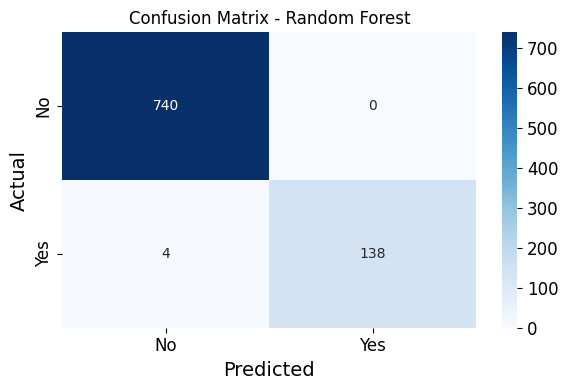

In [64]:
# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("random_forest_confusion_matrix")
plt.show()

In [65]:
print("Classification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

ROC AUC Score: 0.9983346022078416


Saving figure random_forest_roc_curve


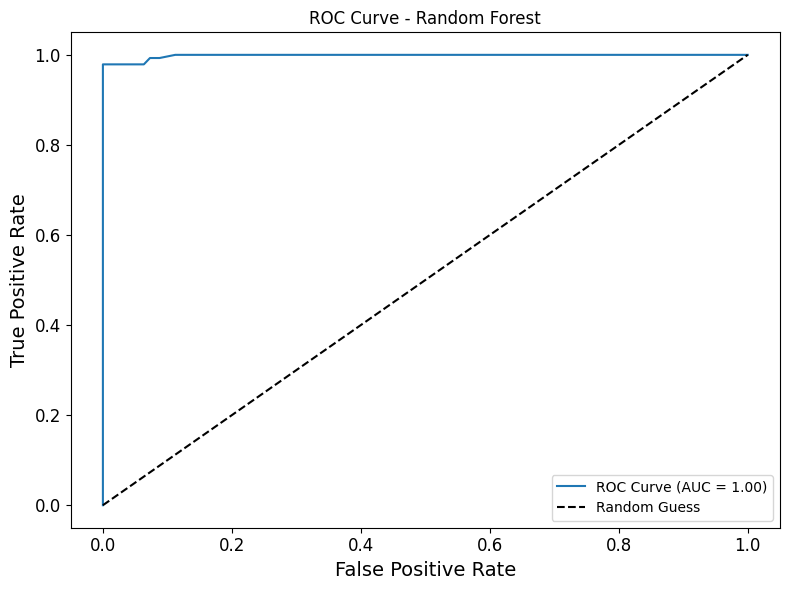

In [66]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="best")
save_fig("random_forest_roc_curve")
plt.show()

## Cross Validation

### On Training Set

In [67]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.9855
Mean CV Precision (Train): 0.9837
Mean CV Recall (Train): 0.9263
Mean CV F1 (Train): 0.9536
Mean CV Roc_auc (Train): 0.9938


### On Test Dataset

In [68]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_pipeline, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.9081
Mean CV Precision (Test): 0.9657
Mean CV Recall (Test): 0.4429
Mean CV F1 (Test): 0.6001
Mean CV Roc_auc (Test): 0.8876


## Hyperparameter Tuning

- **n_estimators**: The number of decision trees in the forest. More trees generally improve model accuracy but increase computation time.
- **max_depth**: The maximum depth of each tree. Limiting the depth can help prevent overfitting.
- **min_samples_split**: The minimum number of samples required to split an internal node.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
- **max_features**: The number of features to consider when looking for the best split. It can be set to 'auto', 'sqrt', 'log2', or a custom value.
- **bootstrap**: Whether to use bootstrapping (sampling with replacement) for generating training subsets. Typically set to `True`.
- **criterion**: The function used to evaluate the quality of a split. Common options are "gini" (Gini impurity) and "entropy" (information gain).

In [69]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 50],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples in a leaf node
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',  # Optimize for F1-score as per priority
    n_jobs=-1
)

# Fit grid search to training data
grid_search_rf.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Use the best model for predictions
rf_best_model = grid_search_rf.best_estimator_

# Test the model
y_pred_rf = rf_best_model.predict(X_test)

Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}


Saving figure random_forest_confusion_matrix_tuned


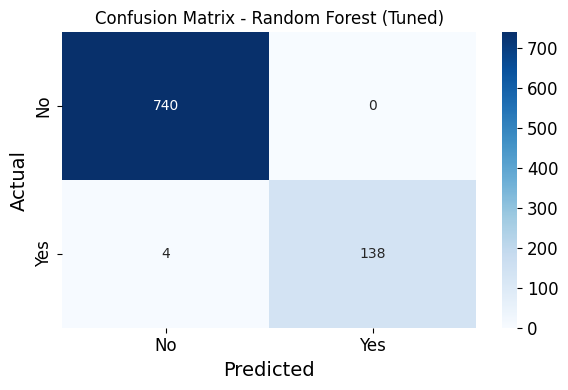

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

ROC AUC Score: 0.9983346022078416


In [70]:
# Evaluate using confusion matrix and metrics
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("random_forest_confusion_matrix_tuned")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_rf)

Saving figure random_forest_roc_curve_tuned


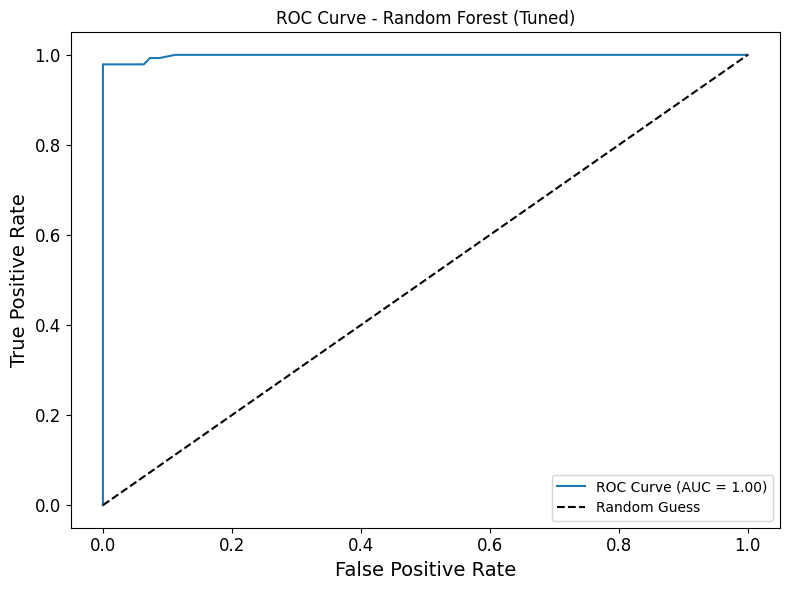

In [71]:
# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Tuned)")
plt.legend(loc="best")
save_fig("random_forest_roc_curve_tuned")
plt.show()

In [72]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.9855
Mean CV Precision (Train): 0.9837
Mean CV Recall (Train): 0.9263
Mean CV F1 (Train): 0.9536
Mean CV Roc_auc (Train): 0.9938


In [73]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_best_model, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.9081
Mean CV Precision (Test): 0.9657
Mean CV Recall (Test): 0.4429
Mean CV F1 (Test): 0.6001
Mean CV Roc_auc (Test): 0.8876


In [74]:
feature_importance = rf_best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
save_fig("random_forest_feature_importance")
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

# Support Vector Machine Classifier

1. **Overview**  
   Support Vector Machine (SVM)$^{[8]}$ is a powerful supervised machine learning algorithm used for both classification and regression tasks. In classification, SVM seeks to find a hyperplane that best separates different classes in the feature space. It is particularly effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples.

2. **Working**  
   - **Hyperplane**: SVM creates a hyperplane that separates the data points of different classes with the maximum margin. The hyperplane is selected to maximize the distance between the closest data points of each class, known as support vectors.
   - **Support Vectors**: Support vectors are the data points that are closest to the hyperplane. These points are crucial in determining the position and orientation of the hyperplane.
   - **Margin**: The margin is the distance between the hyperplane and the closest data point from either class. The goal of SVM is to maximize this margin to ensure better generalization.
   - **Linear and Non-linear Classification**: SVM can handle both linearly separable data (using a linear hyperplane) and non-linearly separable data (using kernel functions).

3. **Types of SVM**  
   - **Linear SVM**: Used when the data is linearly separable. A straight line (in 2D), or a hyperplane (in higher dimensions), is used to separate the classes.
   - **Non-linear SVM**: When the data is not linearly separable, SVM uses a kernel trick to map the input features into a higher-dimensional space, where a linear hyperplane can separate the classes.
     - Common kernel functions:
       - **Polynomial Kernel**: Maps the data into higher dimensions using polynomial functions.
       - **Radial Basis Function (RBF) Kernel**: A popular kernel that maps the data into an infinite-dimensional space.
       - **Sigmoid Kernel**: Similar to the sigmoid activation function in neural networks.

4. **Key Parameters**
   - **C (Regularization Parameter)**: Controls the trade-off between maximizing the margin and minimizing the classification error. A high value of C results in a smaller margin but fewer misclassifications (lower bias, higher variance), while a low value of C results in a larger margin with more misclassifications (higher bias, lower variance).
   - **Kernel**: The kernel function determines the transformation of the data into higher dimensions. Common kernels include linear, RBF, polynomial, and sigmoid.
   - **Gamma (for non-linear kernels)**: Controls the influence of individual data points. A low gamma value makes the decision boundary smoother, while a high gamma value leads to a more complex decision boundary.
   - **Degree (for polynomial kernel)**: The degree of the polynomial used for the polynomial kernel function. Higher degrees can make the model more flexible but also more prone to overfitting.

5. **Advantages**
   - **Effective in High Dimensions**: SVM works well in high-dimensional spaces, making it suitable for tasks like text classification (e.g., spam detection, sentiment analysis) where the number of features can be large.
   - **Robust to Overfitting**: Especially in high-dimensional spaces, SVM tends to avoid overfitting by maximizing the margin.
   - **Memory Efficient**: SVM is memory efficient because it only uses the support vectors to make decisions, which reduces the number of data points required during training.

6. **Disadvantages**
   - **Computationally Expensive**: Training SVM can be computationally intensive, especially with large datasets, as it involves solving a quadratic optimization problem.
   - **Difficult to Interpret**: The decision boundary created by SVM is not always easy to interpret, particularly when using non-linear kernels.
   - **Sensitive to the Choice of Hyperparameters**: The performance of SVM is highly dependent on the choice of kernel, the value of C, and gamma. Hyperparameter tuning is critical for achieving good performance.

7. **Use Cases**
   - **Classification**: SVM is widely used for binary and multi-class classification tasks such as:
     - Image recognition (face detection, object classification)
     - Text classification (email spam detection, sentiment analysis)
     - Bioinformatics (protein classification, gene expression analysis)

In summary, SVM is a powerful and flexible algorithm that excels in high-dimensional spaces and is widely used for classification tasks. However, it can be computationally expensive and sensitive to hyperparameter tuning, especially for non-linear kernels.

In [75]:
# Create pipeline with normalization and SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize data
    ('svm', SVC(probability=True, random_state=42, class_weight='balanced'))  # SVM Classifier
])

In [76]:
# Fit the model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [77]:
# Test the model
y_pred = svm_pipeline.predict(X_test)

Saving figure svm_confusion_matrix


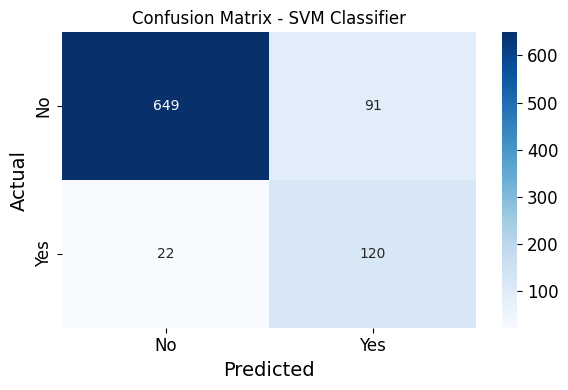

In [78]:
# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("svm_confusion_matrix")
plt.show()

In [79]:
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, svm_pipeline.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       740
           1       0.57      0.85      0.68       142

    accuracy                           0.87       882
   macro avg       0.77      0.86      0.80       882
weighted avg       0.90      0.87      0.88       882

ROC AUC Score: 0.919237723639132


Saving figure svm_roc_curve


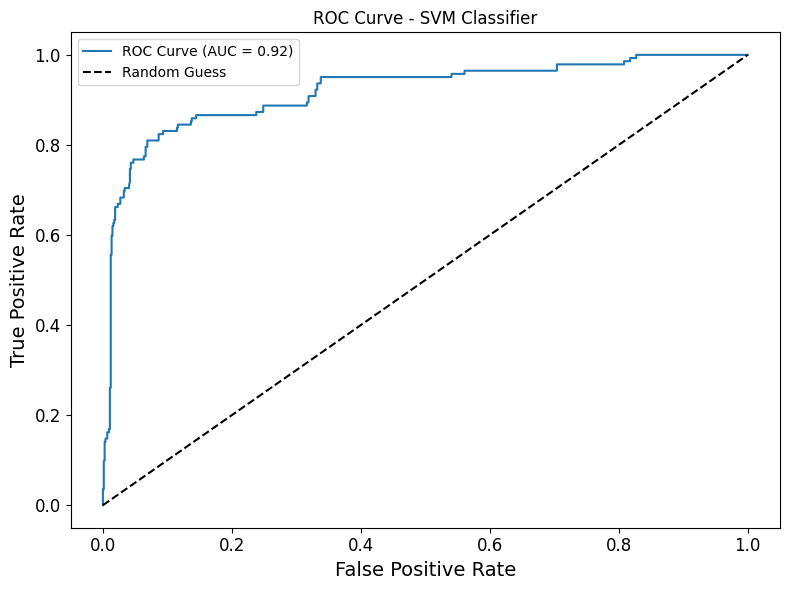

In [80]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Classifier")
plt.legend(loc="best")
save_fig("svm_roc_curve")
plt.show()

## Cross Validation on the Best Parameters

### On Training Set

In [81]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.8699
Mean CV Precision (Train): 0.5642
Mean CV Recall (Train): 0.8647
Mean CV F1 (Train): 0.6822
Mean CV Roc_auc (Train): 0.9331


### On Test Dataset

In [82]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(svm_pipeline, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.8027
Mean CV Precision (Test): 0.4403
Mean CV Recall (Test): 0.7119
Mean CV F1 (Test): 0.5390
Mean CV Roc_auc (Test): 0.8580


## Hyperparameter tuning

1. **C (Regularization Parameter)**  
   - **Description**: Controls the trade-off between maximizing the margin (minimizing the model complexity) and minimizing the classification error (misclassifications).
   - **Effect**:  
     - A **high value** of C results in a smaller margin but fewer misclassifications, leading to a more complex model that may overfit the training data (low bias, high variance).
     - A **low value** of C allows for a larger margin but more misclassifications, leading to a simpler model that may underfit (high bias, low variance).
   - **Tuning**: The optimal value of C depends on the dataset and needs to be chosen based on cross-validation.

2. **Kernel**  
   - **Description**: Defines the function used to map the data into higher-dimensional space to find a linear separating hyperplane.
   - **Types of Kernels**:
     - **Linear**: Suitable when data is linearly separable. Simpler and faster.
     - **Polynomial**: Suitable for data that requires a polynomial decision boundary. The degree of the polynomial is a hyperparameter.
     - **Radial Basis Function (RBF)**: A commonly used kernel for non-linearly separable data. It transforms data into an infinite-dimensional space.
     - **Sigmoid**: Based on the sigmoid function, used less frequently, and can behave similarly to neural networks.
   - **Tuning**: The choice of kernel depends on the nature of the data. RBF is often a default choice for non-linear data.

3. **Gamma (for Non-Linear Kernels, especially RBF)**  
   - **Description**: Defines how far the influence of a single training example reaches. Specifically, it controls the shape of the decision boundary in non-linear SVMs.
   - **Effect**:  
     - A **high value** of gamma results in a very flexible model, potentially leading to overfitting as the decision boundary becomes too complex (low bias, high variance).
     - A **low value** of gamma makes the model simpler and the decision boundary smoother (high bias, low variance).
   - **Tuning**: Gamma should be chosen based on cross-validation. Too high or too low a gamma can lead to poor performance.

4. **Class Weight**  
   - **Description**: Specifies the weights of the classes in case of imbalanced data.
   - **Effect**:  
     - A **higher weight** is assigned to the minority class, helping the model focus more on misclassified examples from that class.
     - Useful for addressing class imbalance by penalizing misclassifications of the minority class.
   - **Tuning**: Can be set to `balanced`, or specific values can be provided based on the problem.

In [83]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear'],  # Kernel type
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'svm__class_weight': ['balanced']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',  # Optimize for F1-score as per priority
    n_jobs=-1
)

# Fit grid search to training data
grid_search_svm.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search_svm.best_params_)

# Use the best model for predictions
svm_best_model = grid_search_svm.best_estimator_

# Test the model
y_pred_svm = svm_best_model.predict(X_test)

Best Hyperparameters: {'svm__C': 10, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


Saving figure svm_confusion_matrix_tuned


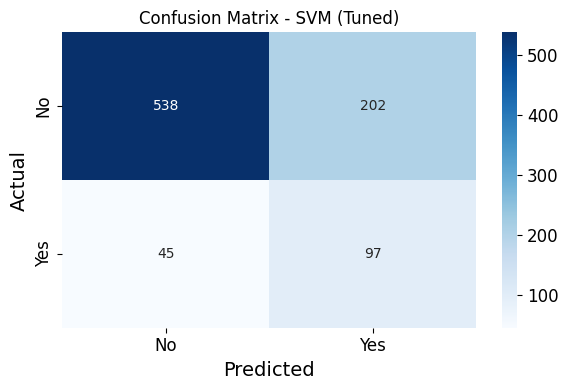

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       740
           1       0.32      0.68      0.44       142

    accuracy                           0.72       882
   macro avg       0.62      0.71      0.63       882
weighted avg       0.83      0.72      0.75       882

ROC AUC Score: 0.7822611343738104


In [84]:
# Evaluate using confusion matrix and metrics
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - SVM (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_fig("svm_confusion_matrix_tuned")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, svm_best_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_svm)

Saving figure svm_roc_curve_tuned


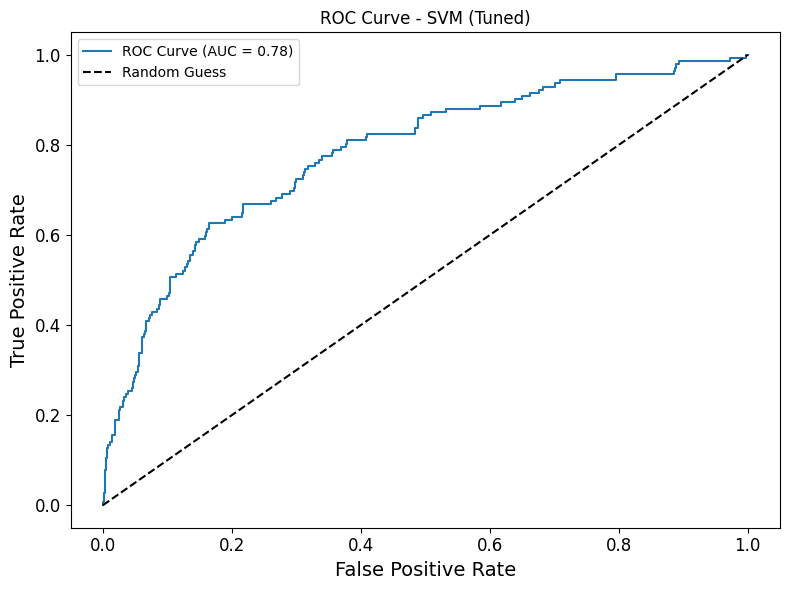

In [85]:
# Plot ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"ROC Curve (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Tuned)")
plt.legend(loc="best")
save_fig("svm_roc_curve_tuned")
plt.show()

In [86]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(svm_best_model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.7120
Mean CV Precision (Train): 0.3228
Mean CV Recall (Train): 0.7117
Mean CV F1 (Train): 0.4438
Mean CV Roc_auc (Train): 0.7902


In [87]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(svm_best_model, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.7063
Mean CV Precision (Test): 0.3248
Mean CV Recall (Test): 0.7543
Mean CV F1 (Test): 0.4528
Mean CV Roc_auc (Test): 0.7834


In [ ]:
if grid_search.best_params_['svm__kernel'] == 'linear':
    coefficients = best_svm.named_steps['svm'].coef_[0]
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': coefficients
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title("Feature Importance - SVM Classifier (Linear Kernel)")
    save_fig("svm_feature_importance")
    plt.show()
else:
    print("Feature importance visualization is not applicable for non-linear kernels.")

# Comparison of Models

- **Logistic Regression**: Simple, fast, and interpretable. It works well when the data is linearly separable or approximately so. It underperforms with complex, non-linear data or in the presence of multicollinearity.
- **Decision Tree**: Offers interpretability and can capture non-linear relationships. However, it can easily overfit, especially if not pruned properly.
- **Random Forest**: A powerful ensemble method that often performs well by reducing overfitting. It’s robust to noise but computationally expensive and less interpretable than individual decision trees.
- **SVM**: Effective for high-dimensional spaces and non-linear data. It requires careful hyperparameter tuning (C, gamma, kernel choice) and is slow with large datasets.

In [88]:
# Define the pipelines for each model
logreg_pipeline = Pipeline([
    ('logreg', LogisticRegression(random_state=42))
])
dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize data
    ('svm', SVC(probability=True, random_state=42, class_weight='balanced'))  # SVM Classifier
])

# Define hyperparameter grids for tuning
logreg_param_grid = {'logreg__C': [0.1, 1, 10], 'logreg__penalty': ['l2']}
dt_param_grid = {
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__class_weight': [None, 'balanced']
}
svm_param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear'],
    'svm__gamma': ['scale', 'auto']
}

# Initialize models with GridSearchCV
models = {
    'Logistic Regression': (logreg_pipeline, logreg_param_grid),
    'Decision Tree': (dt_pipeline, dt_param_grid),
    'Random Forest': (rf_pipeline, rf_param_grid),
    'SVM': (svm_pipeline, svm_param_grid)
}

# Perform GridSearchCV and evaluate models
results = {}
for model_name, (pipeline, param_grid) in models.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    
    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    results[model_name] = {
        'best_model': best_model,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

Logistic Regression Best Parameters: {'logreg__C': 1, 'logreg__penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       740
           1       0.65      0.15      0.25       142

    accuracy                           0.85       882
   macro avg       0.75      0.57      0.58       882
weighted avg       0.82      0.85      0.81       882

Decision Tree Best Parameters: {'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       740
           1       0.90      0.95      0.92       142

    accuracy                           0.98       882
   macro avg       0.95      0.97      0.95       882
weighted avg       0.98      0.98      0.98       882

Random Forest Best Parameters: {'rf__class_weight': 'balanced', 'rf

Saving figure model_comparison


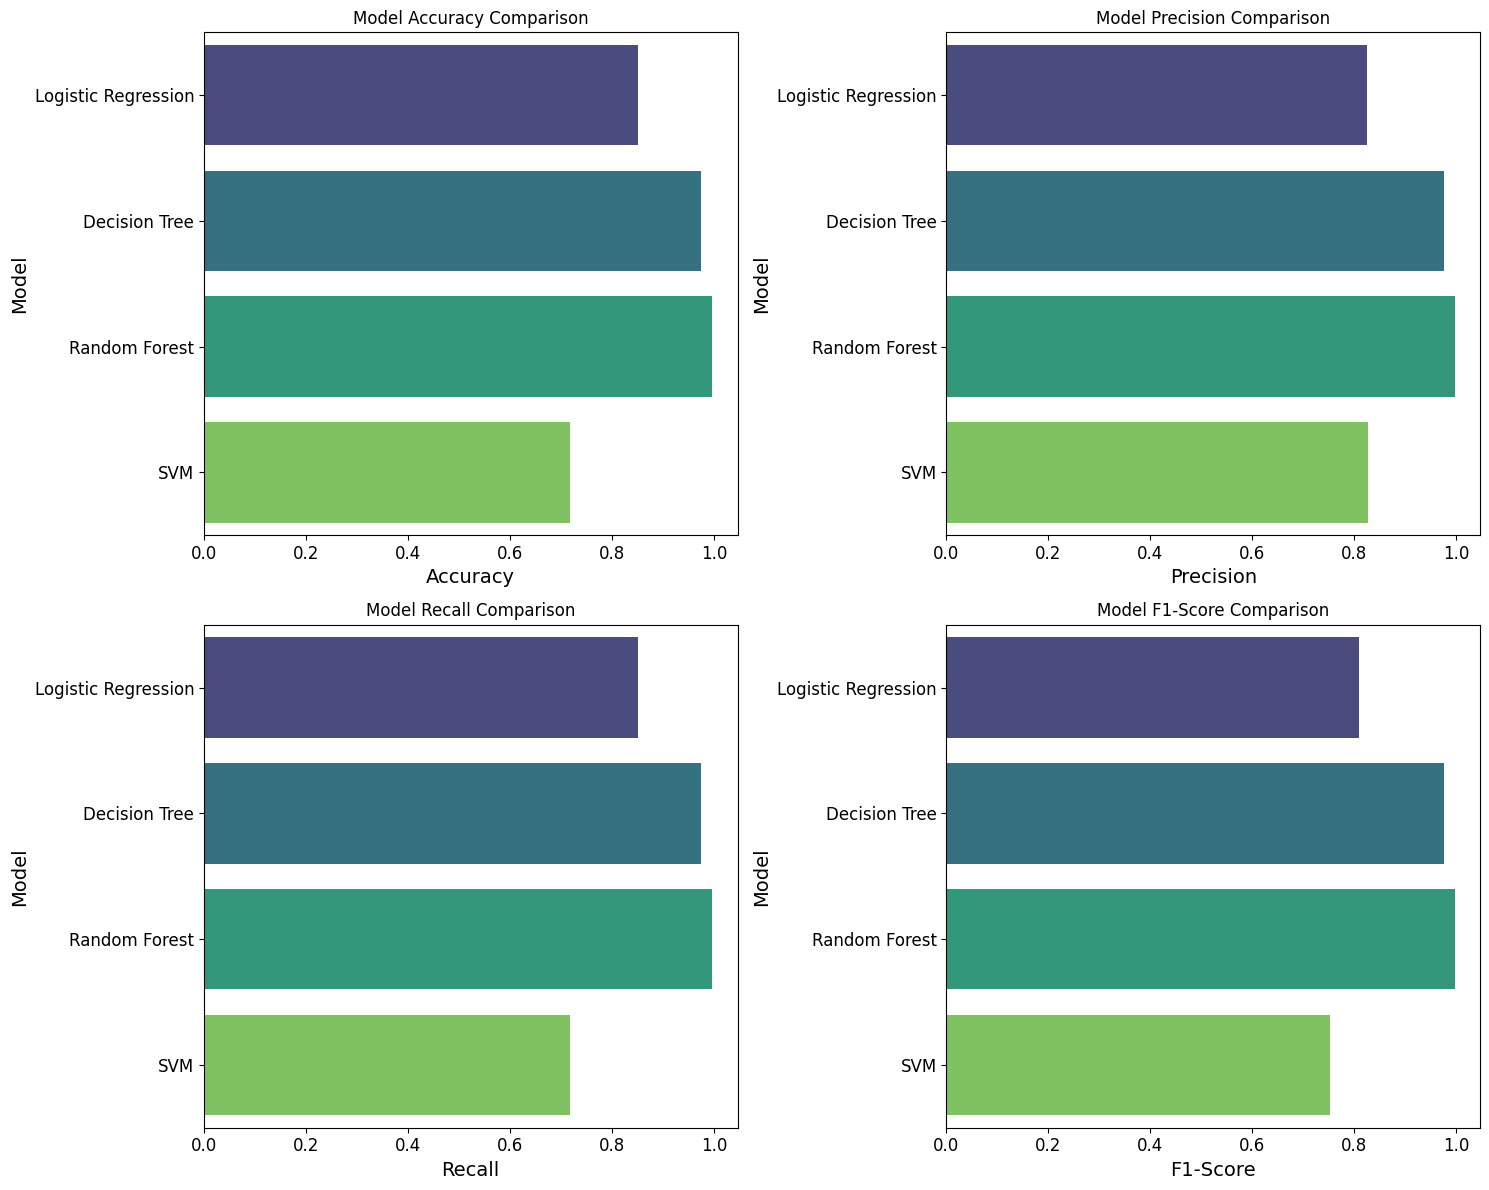

Saving figure roc-auc_comparison


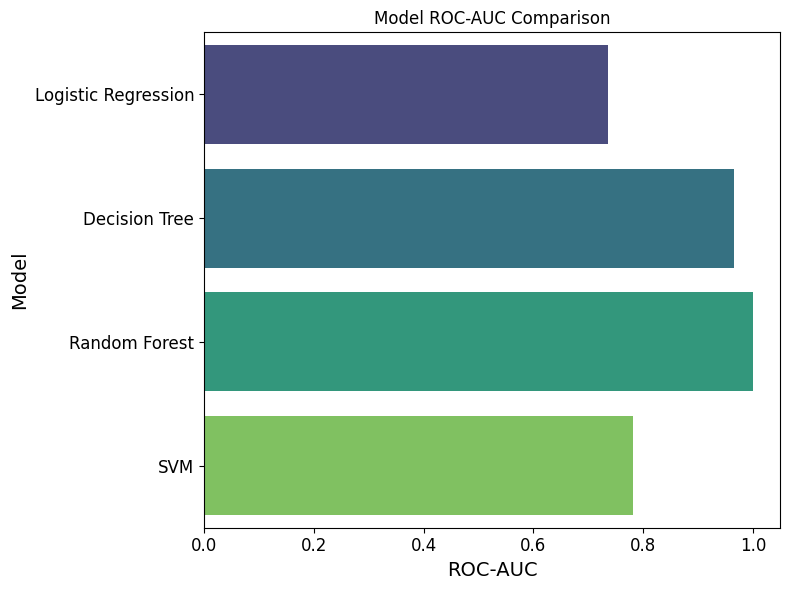

In [89]:
# Collect performance metrics for each model
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Loop through the models and collect metrics
for model_name, result in results.items():
    # Get the best model from the grid search
    best_model = result['best_model']
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = result['classification_report']
    
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1 = classification_rep['weighted avg']['f1-score']
    
    # For ROC-AUC, compute it if the model supports it (binary classification assumed)
    if hasattr(best_model, 'predict_proba'):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        try:
            roc_auc = roc_auc_score(y_test, y_prob)
        except ValueError:
            roc_auc = 0  # In case the model is not well-calibrated for probabilities
    else:
        roc_auc = 0
    
    # Append metrics to the dictionary
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['ROC-AUC'].append(roc_auc)

# Convert the metrics dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics)

# Plot performance comparison (Accuracy, Precision, Recall, F1-Score, ROC-AUC)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy plot
sns.barplot(x='Accuracy', y='Model', data=metrics_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title("Model Accuracy Comparison")

# Precision plot
sns.barplot(x='Precision', y='Model', data=metrics_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title("Model Precision Comparison")

# Recall plot
sns.barplot(x='Recall', y='Model', data=metrics_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title("Model Recall Comparison")

# F1-Score plot
sns.barplot(x='F1-Score', y='Model', data=metrics_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title("Model F1-Score Comparison")

plt.tight_layout()
save_fig("model_comparison")
plt.show()

# Plot ROC-AUC comparison (optional for binary classification models)
plt.figure(figsize=(8, 6))
sns.barplot(x='ROC-AUC', y='Model', data=metrics_df, palette='viridis')
plt.title("Model ROC-AUC Comparison")
save_fig("roc-auc_comparison")
plt.show()

# Best Predictive Model

After analyzing the performance metrics of various models (**Logistic Regression**, **Decision Tree**, **Random Forest**, and **SVM**) across *accuracy, precision, recall, F1-score, and ROC-AUC*, it is evident that the **Random Forest** model consistently outperforms others. 

Specifically, Random Forest achieves the **highest scores** in precision, recall, F1-score, and ROC-AUC, making it the most reliable model for predicting employee attrition. Its ensemble nature combines the strengths of multiple decision trees, leading to superior generalization and handling of imbalanced datasets. 

Therefore, Random Forest is selected as the best predictive model for this task.

# Proposed Solutions

1. **Retention Strategies:**
   - **Identify High-Risk Employees:** Leverage the predictive model to flag employees at high risk of attrition and focus retention efforts on these individuals.
   - **Customized Engagement Plans:** Use insights from the model's feature importance to tailor interventions such as salary adjustments, flexible working arrangements, or career development programs.

2. **Improved Hiring Practices:**
   - Analyze patterns in employee attrition to refine hiring criteria, ensuring a better fit between employees and organizational culture.
   - Develop onboarding programs addressing key factors contributing to early attrition.

3. **Continuous Monitoring:**
   - Regularly update the predictive model with new data to maintain accuracy and adapt to evolving trends in attrition.
   - Implement dashboards to provide real-time insights to HR teams for proactive decision-making.

4. **Data-Driven Policy Formulation:**
   - Use insights from the model to influence company policies, such as workload distribution, leadership training, and recognition programs.
   - Benchmark organizational performance against industry standards to identify areas for improvement.

By combining these predictive insights with actionable strategies, HumanForYou can effectively mitigate employee attrition and foster a more engaged workforce.



# Conclusion

This project demonstrates the power of machine learning in addressing critical business challenges like employee attrition. By identifying the Random Forest model as the most effective predictor, HumanForYou gains a valuable tool for proactive decision-making. The proposed solutions, rooted in data-driven insights, provide a strategic framework to reduce turnover, enhance employee satisfaction, and improve organizational performance. With continuous monitoring and adaptation, this predictive framework will not only help retain top talent but also position HumanForYou as a leader in employee engagement and workforce stability.

# Bibliography

[1] - Feature selection. (n.d.). https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

[2] - StratifiedShuffleSplit. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

[3] - Das, A. (2024). Logistic regression. In Encyclopedia of Quality of Life and Well-Being Research (pp. 3985-3986). Cham: Springer International Publishing.

[4] - GeeksforGeeks. (2024, June 20). Logistic regression in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/understanding-logistic-regression/

[5] - Post pruning decision trees with cost complexity pruning. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/auto_examples/tree/plot_cost_complexity_pruning.html

[6] - GeeksforGeeks. (2024b, December 11). Random Forest algorithm in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

[7] - RandomForestClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[8] - SVC. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html